In [1]:
from src.models.modulated_siren import ModulatedSirenModel
from src.datasets.chairs import get_mgrid
import torch

/home/arkadi.piven/miniconda3/envs/gip_med_wsi_env/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from src.models.modulated_siren import ModulatedSirenModel
import pytorch_lightning as pl

# Create an instance of the ModulatedSirenModel
model = ModulatedSirenModel(in_features=2, hidden_features=256, hidden_layers=2, out_features=3, outermost_linear=True, first_omega_0=30, hidden_omega_0=30.)

# Load the checkpoint
checkpoint_path = "/home/arkadi.piven/Code/functa/checkpoints/all_chairs_fully_fledged_meta_learning/last.ckpt"
model = model.load_from_checkpoint(checkpoint_path, in_features=2, hidden_features=256, hidden_layers=10, out_features=3, outermost_linear=True, first_omega_0=30, hidden_omega_0=30.)

Chairs dataset initialized
['292621234cdb42969c76680ce8100088', '768843209e734d569d1b527c1f3511a1', '66624c84a4d94559b35914ee2ada4c4b', 'a9328e057fe049ff8b0c35489e0dfb8d', '607a3bf3fbc54bd2b9da08c18f625ee4', '039c6026571943d6ac45c6816bcc7ff1', '4c302192035d40e59b7c0f18bb74f212', '6a', 'd2d5000b1e7a4d9a8a4a637267418061', '0f7366550f694e1cb9efddea214a3c33', '9f7890238c4442d789d1970cead93203', '3efb9e42f49f47c6bd1d36f86281888b', '9d53c4f8a4394a9ca333da20138cd897', '79c0f5d111324264b4c6fea9402df88e', '4e', 'c6e96', 'c25d29', '03f16302c1a54c46b438dac78e9d7048', '600e', '64b170e4864549c382b6c94c529203d7', '2820827abdcd4e79b7c67683292416aa', '934b7b5515da4720b0af2764924aad3a', '053039b95c314104b5fe0dfb19f43cb3', '43c8828e83124e1e90e85c9e57b404c8', '2ec01ec1eb874f6fb11ef732fb575267', '392e2810e1e24b02b2fdbc1dd3f21064', 'fab9443d48e24fbfa309187df78d58e6', '0edcc9053a114e7f8a706cae0864e7be', 'b10ee58a01b649d381598d899850176c', '15b2ebce6f084c3ea8d582c168ff478e', 'ddd35916c5d84fd8ab4c38380a73fb5b

/home/arkadi.piven/miniconda3/envs/gip_med_wsi_env/lib/python3.10/site-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /opt/conda/conda-bld/pytorch_1659484803030/work/aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([[-0.9803, -0.9836, -0.9879],
        [-0.9808, -0.9838, -0.9878],
        [-0.9815, -0.9841, -0.9878],
        ...,
        [-0.9870, -0.9909, -0.9892],
        [-0.9870, -0.9917, -0.9899],
        [-0.9871, -0.9926, -0.9906]], grad_fn=<AddmmBackward0>)


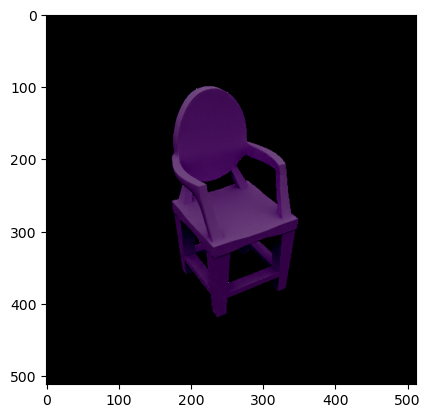

In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from src.datamodules.chairs_datamodule import ChairsDatamodule
import torchvision. transforms as T
from PIL import Image

# Define the grid
chairs = ChairsDatamodule("/home/arkadi.piven/Code/functa/rendered/chair", 1)
transform = T.ToPILImage()
coords, pixels = chairs.train_dataset[6]
coords = get_mgrid(512, 2)
print(pixels)

# # Pass the coordinates through the model
output = model(coords)
print(output)


# Reshape the output to (512, 512, 3)
# print(output.shape)

# # Plot the image

plt.imshow(pixels.view(512,512,3).detach().numpy())

# plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


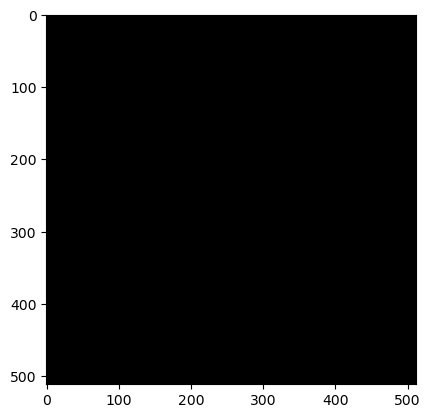

In [4]:
# Output base weights
plt.imshow(output.view(512,512,3).detach().numpy())

## Train latent and visualize

BEGIN OF TRAINING PHI Parameter containing:
tensor([-0.0010,  0.0032,  0.0043,  0.0195,  0.0132, -0.0012, -0.0009,  0.0108,
         0.0007, -0.0050,  0.0040,  0.0032, -0.0014, -0.0082,  0.0066,  0.0016,
         0.0257,  0.0020, -0.0113, -0.0100, -0.0129, -0.0053,  0.0047, -0.0023,
        -0.0051,  0.0076, -0.0055, -0.0011, -0.0107, -0.0104, -0.0163, -0.0107,
         0.0032,  0.0075,  0.0155,  0.0153,  0.0074, -0.0049, -0.0033, -0.0176,
        -0.0054,  0.0025,  0.0059, -0.0158,  0.0015,  0.0151,  0.0042,  0.0024,
         0.0018, -0.0040,  0.0034, -0.0089, -0.0032, -0.0058,  0.0050, -0.0180,
         0.0009, -0.0133,  0.0143, -0.0072, -0.0009,  0.0120,  0.0074, -0.0078,
         0.0126,  0.0084,  0.0076, -0.0038,  0.0094,  0.0101, -0.0051,  0.0089,
        -0.0048, -0.0143, -0.0154, -0.0009, -0.0010, -0.0024, -0.0019, -0.0244,
         0.0025, -0.0094, -0.0022, -0.0013, -0.0119, -0.0046,  0.0003, -0.0092,
        -0.0053,  0.0086,  0.0009, -0.0002, -0.0060,  0.0006, -0.0240,  0.00

  0%|          | 0/3 [00:00<?, ?it/s]

START PHI: Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.,

 33%|███▎      | 1/3 [00:22<00:45, 22.97s/it]

END PHI: Parameter containing:
tensor([-9.2049e-04,  4.3637e-03,  6.0907e-03,  1.7503e-02,  9.9550e-03,
        -5.5874e-04, -1.2844e-03,  1.1253e-02, -5.7289e-05, -4.0630e-03,
         4.6874e-03,  3.4816e-03, -2.3331e-03, -6.6757e-03,  6.9142e-03,
         2.9831e-03,  2.4493e-02,  1.5600e-04, -9.2493e-03, -9.2247e-03,
        -1.1980e-02, -6.0579e-03,  4.1538e-03, -3.4146e-04, -6.4634e-03,
         8.6926e-03, -5.8270e-03,  1.0885e-04, -8.4931e-03, -1.1384e-02,
        -1.4669e-02, -1.3103e-02,  1.3185e-03,  8.6549e-03,  1.4183e-02,
         1.6645e-02,  7.3198e-03, -2.2064e-03, -3.5006e-03, -1.6045e-02,
        -4.6650e-03,  5.6323e-04,  4.5761e-03, -1.7250e-02, -5.4976e-04,
         1.3834e-02,  3.0248e-03,  2.4413e-03,  3.4137e-04, -2.7802e-03,
         4.1246e-03, -5.8862e-03,  1.1023e-03, -7.7804e-03,  5.4794e-03,
        -1.7937e-02, -9.0265e-04, -1.3088e-02,  1.3785e-02, -7.5454e-03,
        -9.6210e-04,  9.2047e-03,  7.3015e-03, -7.5619e-03,  1.1195e-02,
         7.9619e-03,

 67%|██████▋   | 2/3 [00:41<00:20, 20.64s/it]

END PHI: Parameter containing:
tensor([-8.9478e-04,  4.7794e-03,  6.1369e-03,  1.7842e-02,  1.0072e-02,
        -6.0346e-04, -1.1504e-03,  1.1410e-02, -2.4538e-04, -3.9873e-03,
         4.7371e-03,  3.2206e-03, -2.1260e-03, -6.4576e-03,  6.7859e-03,
         2.7913e-03,  2.4555e-02,  4.7664e-04, -9.1129e-03, -9.1623e-03,
        -1.2111e-02, -5.9674e-03,  3.9908e-03, -7.1221e-04, -5.8039e-03,
         8.4484e-03, -6.0169e-03, -1.0778e-04, -8.6262e-03, -1.1483e-02,
        -1.4757e-02, -1.2954e-02,  1.7137e-03,  9.0464e-03,  1.4086e-02,
         1.6611e-02,  7.4061e-03, -2.9533e-03, -3.4597e-03, -1.6478e-02,
        -5.0679e-03,  9.0242e-04,  4.5095e-03, -1.7542e-02, -1.7831e-04,
         1.3682e-02,  3.1274e-03,  2.2140e-03,  4.3257e-04, -2.9098e-03,
         4.1958e-03, -6.5389e-03,  6.2225e-04, -7.2675e-03,  5.4326e-03,
        -1.7620e-02, -1.2992e-03, -1.3249e-02,  1.3954e-02, -7.3917e-03,
        -1.4821e-03,  9.6202e-03,  7.5546e-03, -7.4552e-03,  1.1992e-02,
         7.8695e-03,

100%|██████████| 3/3 [00:58<00:00, 19.54s/it]

END PHI: Parameter containing:
tensor([-7.9820e-04,  5.2569e-03,  6.3729e-03,  1.7979e-02,  9.9225e-03,
        -5.1166e-04, -1.0481e-03,  1.1572e-02, -4.5966e-04, -3.8237e-03,
         4.8594e-03,  2.8639e-03, -1.9444e-03, -6.2784e-03,  6.5627e-03,
         2.5658e-03,  2.4436e-02,  6.5950e-04, -8.8261e-03, -9.1164e-03,
        -1.2161e-02, -5.9216e-03,  3.8098e-03, -9.5017e-04, -5.1571e-03,
         8.2126e-03, -6.1946e-03, -2.5365e-04, -8.6472e-03, -1.1572e-02,
        -1.4811e-02, -1.2885e-02,  2.0220e-03,  9.4516e-03,  1.3861e-02,
         1.6564e-02,  7.4184e-03, -3.5509e-03, -3.4434e-03, -1.6680e-02,
        -5.3513e-03,  1.1662e-03,  4.2949e-03, -1.7912e-02,  1.5580e-04,
         1.3550e-02,  3.1032e-03,  1.9822e-03,  4.3165e-04, -2.9689e-03,
         4.2806e-03, -7.0409e-03,  4.3213e-04, -6.8332e-03,  5.3667e-03,
        -1.7327e-02, -1.8953e-03, -1.3412e-02,  1.4107e-02, -7.3140e-03,
        -2.0233e-03,  9.7683e-03,  7.7501e-03, -7.2579e-03,  1.2565e-02,
         7.7247e-03,


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([[-0.9917, -0.9934, -0.9993],
        [-0.9914, -0.9923, -0.9983],
        [-0.9908, -0.9911, -0.9969],
        ...,
        [-0.9827, -0.9910, -0.9886],
        [-0.9843, -0.9922, -0.9901],
        [-0.9860, -0.9935, -0.9918]], grad_fn=<AddmmBackward0>)
torch.Size([262144, 3])


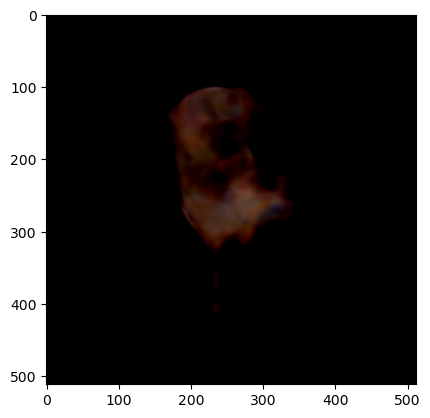

In [7]:
batch = chairs.train_dataset[0]
print(f"BEGIN OF TRAINING PHI {model.phi}")
model.train_latent(batch)
print(f"END OF TRAINING PHI {model.phi}")
coords = get_mgrid(512, 2)

output = model(coords)
print(output)

print(output.shape)

# Plot the image
plt.imshow(output.view(512,512,3).detach().numpy())

plt.show()
